# Pytorch Computer Vision

## 0. Computer Vision libraries in pytorch

* `torchvision` - base domain library for pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.tranforms` - functions for manipulating  your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for pytorch
* `torch.utils.data.DataLoader` - Creates a python iterable over a dataset

In [ ]:
# import pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check Versions
print(torch.__version__)
print(torchvision.__version__)


2.1.0+cu121
0.16.0+cu121


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST.

In [ ]:
# Setup the training data
train_data = datasets.FashionMNIST(
    root= 'data', # where to download data to
    train=True, # do we want the training dataset
    download=True, # do we want to download the data
    transform=ToTensor(), # how do we want to transform the data
    target_transform=None # how do we want to transform the labels
)

test_data = datasets.FashionMNIST(
    root= 'data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

100%|██████████| 26421880/26421880 [00:02<00:00, 9979552.80it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 176665.34it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3244003.18it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 1558671.55it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# see the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# check the shape of our image
print(f"Image Shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

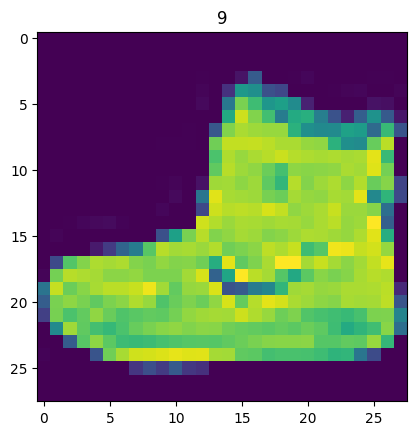

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

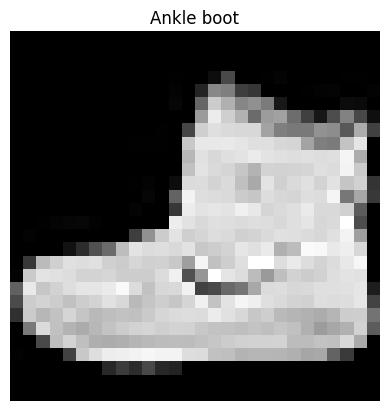

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

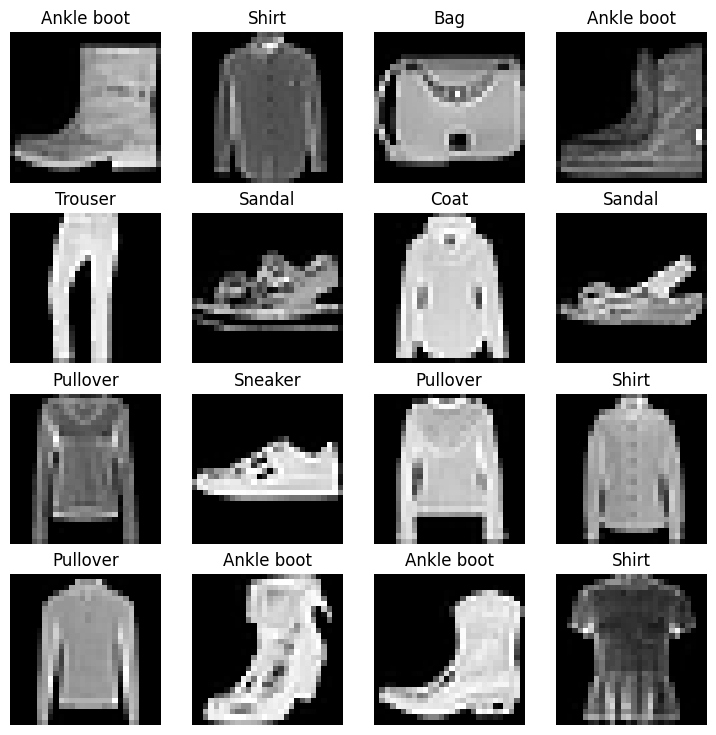

In [ ]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False);

## 2. Prepare DataLoader

Right now, our data is in the form of pytorch Datasets

Recall That a data loader turns our dataset into Pytorch iterable

More specifically we want to turn our data into Batches (or mini-batches)

why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. so we break it down to 32 images at a time (batch size of 32)

2. It gives our neural network more chances to update its gradients per epoch.



In [ ]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f276daa0e80>,
 <torch.utils.data.dataloader.DataLoader at 0x7f276da7a800>)

In [ ]:
# lets check out what we have created
print(f'dataloaders: {train_dataloader, test_dataloader}')
print(f'Length of the train dataloader {len(train_dataloader)} Batches of {BATCH_SIZE}')
print(f'Length of the test dataloader {len(test_dataloader)} Batches of {BATCH_SIZE}')

dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f276daa0e80>, <torch.utils.data.dataloader.DataLoader object at 0x7f276da7a800>)
Length of the train dataloader 1875 Batches of 32
Length of the test dataloader 313 Batches of 32


In [ ]:
# check out whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, Label size torch.Size([])


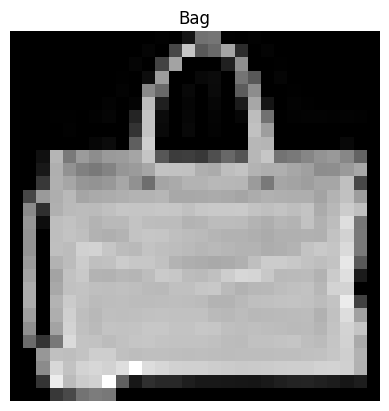

In [ ]:
# show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size: {img.shape}')
print(f'Label: {label}, Label size {label.shape}')


## 3. Model 0: Build a baseline model

When starting to build a series of machine learning experience, its best practice to start with a baseline model.

A baseline model is a simple model you will try to improve upon with subsequent models/experiments.

start simple and add complexity when necessary

In [ ]:
# create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x) # perform the forward pass

# print what happened
print(f'Shape before flattening: {x.shape} -> [color_channels, height, width]')
print(f'Shape after flattening: {output.shape} [color_channels, height * width]')

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) [color_channels, height * width]


In [ ]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [ ]:
from torch import nn
class FashionMNISTmodelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# setup model with input parameters
model_0 = FashionMNISTmodelV0(
    input_shape=784,
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to('cpu')

model_0

FashionMNISTmodelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x).argmax()

tensor(4)

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - Since we are working with multi-class data, our loss function will be `nn.CrossentropyLoss()`

* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)

* Evaluation metric - since we're working on a classification problem lets use accuracy lets use accuracy as our classification metric

In [ ]:
import requests
from pathlib import Path

# download helper functions from learn pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already, exists, skipping the download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# Import the accuracy metric
from helper_functions import accuracy_fn

# setup loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll want to track are:
1. Models performance (loss and accuracy values)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """ Prints difference between start and end time."""
  total_time = end - start
  print(f"train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start_time, end_time, device='cpu')

train time on cpu: 0.000 seconds


7.4266000069656e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through the epochs.
2. Loop through training batches, perform training steps, calculate the train loss **per batch**.
3. Loop through testing batches,  perform testing steps,  calculate the test loss **per batch**
4. Print out whats happening.
5. Time it all

In [ ]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs (well keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}\n-----")
  ### training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. forward pass
    y_pred = model_0(X)

    # 2. calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backwards (backpropagation)
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # print out whats happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # forward pass
      test_pred = model_0(X_test)

      # calculate the loss
      test_loss += loss_fn(test_pred, y_test)

      # calculate the accuracy
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    # calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per epoch
    test_acc /= len(test_dataloader)

  # print out whats happening
  print(f"\nTrain loss: {train_loss:.4f} | test loss: {test_loss:.4f} | test acc: {test_acc:.4f}%")

# calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(train_time_start_on_cpu,
                 train_time_end_on_cpu,
                 device=str(next(model_0.parameters()).device))




  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
-----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.5904 | test loss: 0.5095 | test acc: 82.0387%
epoch: 1
-----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.4763 | test loss: 0.4799 | test acc: 83.1969%
epoch: 2
-----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.4550 | test loss: 0.4766 | test acc: 83.4265%
train time on cpu: 28.648 seconds


## 4. Make Predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """ Returns a Dictionary containing the results of model predicting on data_loader. """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # make predictions
      y_pred = model(X)

      # accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # scale the acc and loss to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,  # this only works when the model was created with a class
          "model_loss": loss.item(),
          "model_accuracy": acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTmodelV0',
 'model_loss': 0.47663888335227966,
 'model_accuracy': 83.42651757188499}

## 5. Set up device agnostic code to run on a gpu if its available

In [ ]:
# Set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

In [ ]:
# Create a model with linear and non-linear layers
class FashionMNISTmodelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)


In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTmodelV1(input_shape=784, # this is the output of our flatten layer
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 Functionizing Training and evaluation/testing loops

Lets create a function for:
* training loop: `train_step()`
* testing loop: `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  """ Performs a training step with model trying to learn on the data loader"""
  train_loss, train_acc = 0, 0

  # put the model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put the data on the target device
    X, y = X.to(device), y.to(device)

    # 1. forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y,
                             y_pred.argmax(dim=1))

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backwards (backpropagation)
    loss.backward()

    # 5. optimizer step
    optimizer.step()

  # Divide total train loss and accuracy by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | train acc: {train_acc:.2f}%")

In [ ]:

def testing_step(model: torch.nn.Module,
                 data_loader: torch.utils.data.DataLoader,
                 loss_fn: torch.nn.Module,
                 accuracy_fn,
                 device: torch.device = device):

  """ performs a testing loop step on the model going over the data loader"""

  ### Testing
  test_loss, test_acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y =  X.to(device), y.to(device)
      # forward pass
      test_pred = model(X)

      # calculate the loss
      test_loss += loss_fn(test_pred, y)

      # calculate the accuracy
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    # calculate the test loss average per batch
    test_loss /= len(data_loader)

    # Calculate the test acc average per epoch
    test_acc /= len(data_loader)

  # print out whats happening
  print(f"\ntest loss: {test_loss:.4f} | test acc: {test_acc:.2f}%")

In [ ]:
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_gpu = timer()

# set epochs
epochs = 3

# create a optimization and evaluation loop using train step and test step
for epoch in tqdm(range(epochs)):
  print(f'epoch: {epoch}\n--------')
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  testing_step(model=model_1,
               data_loader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)

train_time_end_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_gpu,
                                            end=train_time_end_gpu,
                                            device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
--------
Train loss: 1.09199 | train acc: 61.34%

test loss: 0.9564 | test acc: 65.00%
epoch: 1
--------
Train loss: 0.78101 | train acc: 71.93%

test loss: 0.7223 | test acc: 73.91%
epoch: 2
--------
Train loss: 0.67027 | train acc: 75.94%

test loss: 0.6850 | test acc: 75.02%
train time on cuda: 31.203 seconds


In [ ]:
model_0_results

{'model_name': 'FashionMNISTmodelV0',
 'model_loss': 0.47663888335227966,
 'model_accuracy': 83.42651757188499}

In [ ]:
total_train_time_model_0

28.64759046300003

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """ Returns a Dictionary containing the results of model predicting on data_loader. """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our code device agnostic
      X, y = X.to(device), y.to(device)

      # make predictions
      y_pred = model(X)

      # accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # scale the acc and loss to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,  # this only works when the model was created with a class
          "model_loss": loss.item(),
          "model_accuracy": acc}

In [ ]:
# Get model_1 results

model_1_results = eval_model(model=model_1,
           data_loader=test_dataloader,
           loss_fn=loss_fn,
           accuracy_fn=accuracy_fn)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTmodelV1',
 'model_loss': 0.6850008964538574,
 'model_accuracy': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTmodelV0',
 'model_loss': 0.47663888335227966,
 'model_accuracy': 83.42651757188499}

## Model 2: Building a Convolutional Neural Network

CNN'S are also known ConvNets.

CNN'S are known for their capabilities to find patterns in visual data.

To Find our more about whats happening inside a CNN see this website:
https://poloclub.github.io/cnn-explainer/

In [ ]:
# Create a convolutional neural network
class FashionMNISTmodelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  Model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),  # These  are our hyper parameters kernel, stride, padding
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units *7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shapee of conv_block_1 {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shapee of conv_block_2 {x.shape}")
    x = self.classifier(x)
    # print(f"Output shapee of classifier {x.shape}")
    return x

In [ ]:
image.shape # input shape is the color channel

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTmodelV2(input_shape=1, # input shape is the color channel
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

### 7.1 Stepping through `nn.Conv2d`

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
torch.manual_seed(42)

# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [ ]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

### 7.2 Stepping through nn.MaxPool2d()

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.maxpool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the Conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_maxpool_and_conv = max_pool_layer(test_image_through_conv)
print(f"Shape after going through maxpool and conv layer: {test_image_through_maxpool_and_conv.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through maxpool and conv layer: torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
# create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
random_tensor

max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)

print(f"\nRandom Tensor:\n {random_tensor}")
print(f"Random Tensor shape:\n {random_tensor.shape}")

print(f"\nMax pool Tensor:\n {max_pool_tensor}")
print(f"Max pool Tensor shape:\n {max_pool_tensor.shape}")




Random Tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random Tensor shape:
 torch.Size([1, 1, 2, 2])

Max pool Tensor:
 tensor([[[[0.3367]]]])
Max pool Tensor shape:
 torch.Size([1, 1, 1, 1])


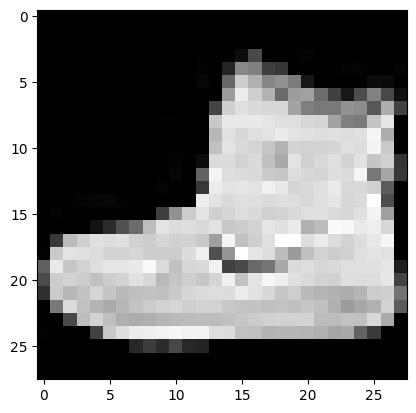

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')

In [ ]:
# Create a random tensor thats the same shape as our image
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor = rand_image_tensor.to(device)

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
# pass random image tensor through the model
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.3 Setup a loss function and optimizer for model_2

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.4 Training and Testing loop for model_2

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure the time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epoch = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model_2,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)
  testing_step(model_2,
               test_dataloader,
               loss_fn,
               accuracy_fn,
               device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(train_time_start_model_2,
                                            train_time_end_model_2,
                                            device)





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.59291 | train acc: 78.43%

test loss: 0.3961 | test acc: 85.88%
Epoch: 1
--------
Train loss: 0.36441 | train acc: 86.79%

test loss: 0.3504 | test acc: 87.11%
Epoch: 2
--------
Train loss: 0.32540 | train acc: 88.24%

test loss: 0.3163 | test acc: 88.36%
train time on cuda: 38.904 seconds


In [ ]:
model_2_results = eval_model(model_2,
           test_dataloader,
           loss_fn,
           accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_0_results

{'model_name': 'FashionMNISTmodelV0',
 'model_loss': 0.47663888335227966,
 'model_accuracy': 83.42651757188499}

### 8. Compare model results and training time

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_accuracy
0,FashionMNISTmodelV0,0.476639,83.426518
1,FashionMNISTmodelV1,0.685001,75.019968
2,FashionMNISTmodelV2,0.316306,88.358626


In [ ]:
# Add training time to the results comparasion
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_accuracy,training_time
0,FashionMNISTmodelV0,0.476639,83.426518,28.647590
1,FashionMNISTmodelV1,0.685001,75.019968,31.203315
2,FashionMNISTmodelV2,0.316306,88.358626,38.903887


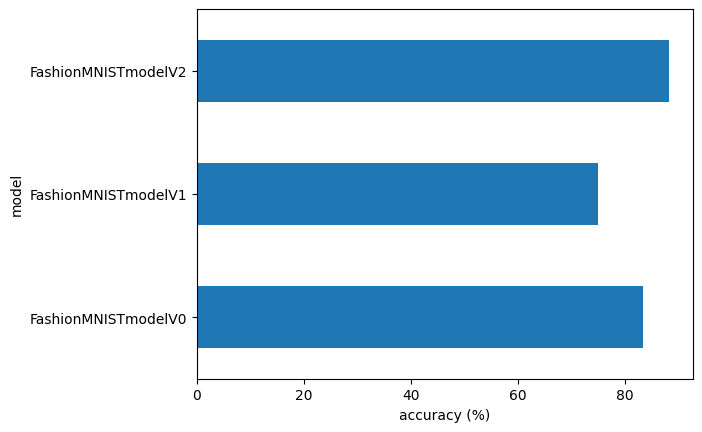

In [ ]:
# Visualize our model result

compare_results.set_index("model_name")["model_accuracy"].plot(kind='barh')
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [ ]:
## 9. Make and evaluate random predictions with the best model
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass(model outputs raw logits)
      pred_logits = model(sample)

      # get prediction probability (logits -> prediction probability)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      # Get pred_prob off the gpu for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)



In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

  # View the first sample shape

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

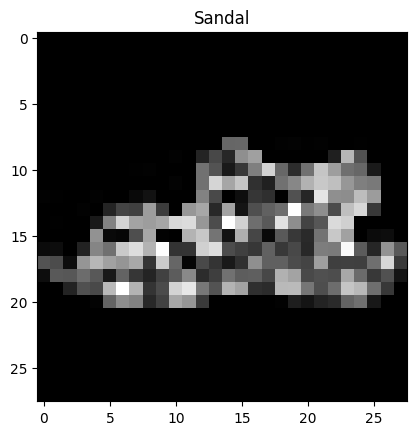

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# view pred probs
pred_probs[:2]

tensor([[2.0145e-06, 4.8029e-06, 7.6542e-06, 5.6240e-05, 3.0417e-05, 9.9813e-01,
         1.2753e-05, 8.4097e-04, 1.3695e-04, 7.7952e-04],
        [1.0673e-02, 3.5533e-05, 5.8587e-02, 1.2818e-03, 1.2450e-01, 6.8852e-06,
         8.0477e-01, 3.6846e-06, 1.2442e-04, 1.3792e-05]])

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 6, 6, 6, 3, 1, 2, 3, 6])

In [ ]:
test_labels

[5, 6, 6, 4, 3, 1, 4, 6, 6]

In [ ]:
image, label = test_data[0][:10]
image.shape, label

(torch.Size([1, 28, 28]), 9)

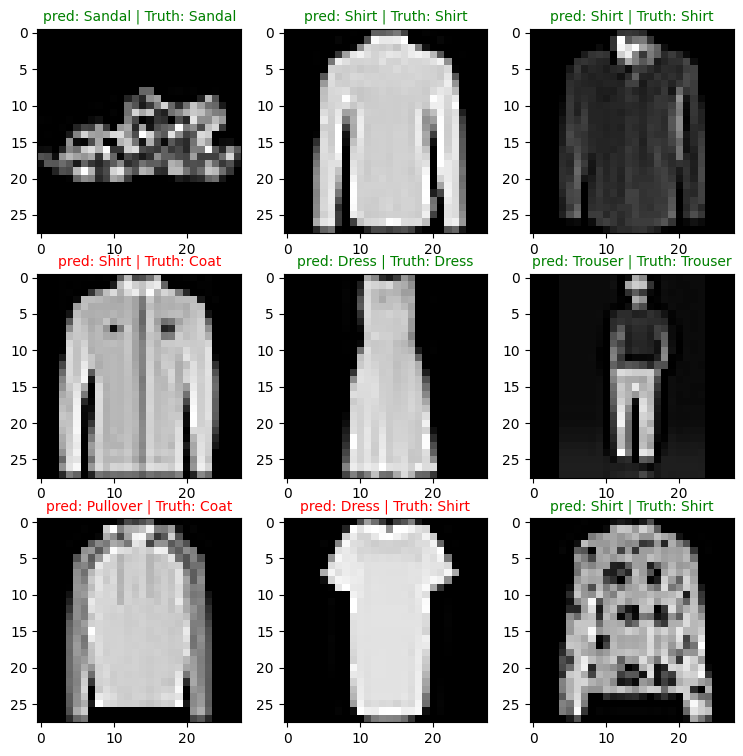

In [ ]:
# plot predictions
plt.figure(figsize=(9, 9))
nrows= 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the predictions (in text form, e.g " sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth labels in text form
  truth_label = class_names[test_labels[i]]

  # create a title
  title_text = f"pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change the color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

## 10. Making a confusion matrix for further prediction evaluation

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mextend.plotting.plot_confusion_matrix`


In [ ]:
import mlxtend

In [ ]:
mlxtend.__version__

'0.22.0'

In [ ]:
# 1. make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions...."):
    # Send the data to the device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logits = model_2(X)
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    # put predictions on the cpu for evaluation
    y_preds.append(y_pred.cpu())

  # Concate
  # print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 38.2 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [ ]:
assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"

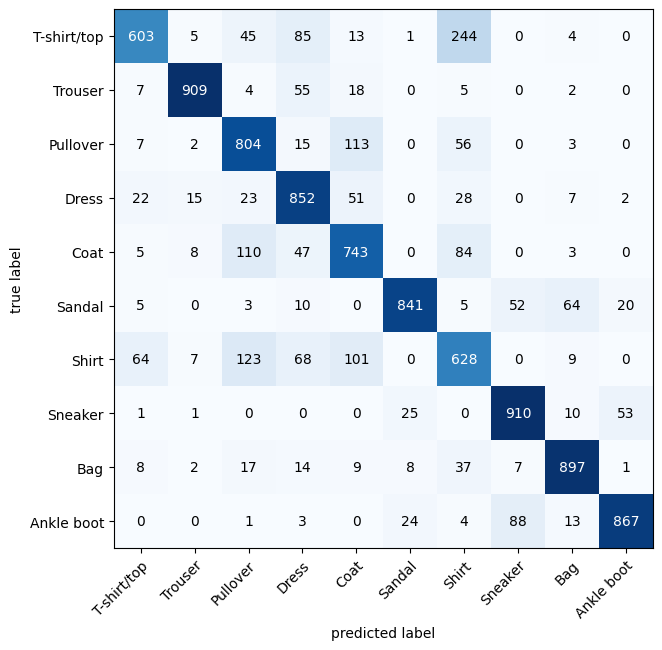

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Set up confusion matrix instance and compare predictions to truth
task = "multiclass"
confmat = ConfusionMatrix(task=task,
                          num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. plt the confustion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)


In [ ]:
confmat_tensor

tensor([[603,   5,  45,  85,  13,   1, 244,   0,   4,   0],
        [  7, 909,   4,  55,  18,   0,   5,   0,   2,   0],
        [  7,   2, 804,  15, 113,   0,  56,   0,   3,   0],
        [ 22,  15,  23, 852,  51,   0,  28,   0,   7,   2],
        [  5,   8, 110,  47, 743,   0,  84,   0,   3,   0],
        [  5,   0,   3,  10,   0, 841,   5,  52,  64,  20],
        [ 64,   7, 123,  68, 101,   0, 628,   0,   9,   0],
        [  1,   1,   0,   0,   0,  25,   0, 910,  10,  53],
        [  8,   2,  17,  14,   9,   8,  37,   7, 897,   1],
        [  0,   0,   1,   3,   0,  24,   4,  88,  13, 867]])

In [ ]:
## 11. Save and load best performing model

from pathlib import Path

# Create a model path
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# create a model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# save the model state dict
print(f"saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

saving the model to: Models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTmodelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))
# load in the saved state dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTmodelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTmodelV2',
 'model_loss': 0.31630638241767883,
 'model_accuracy': 88.35862619808307}

In [ ]:
# evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn

)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTmodelV2',
 'model_loss': 0.31630638241767883,
 'model_accuracy': 88.35862619808307}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02) # adjust the tolerance

tensor(True)

## Exercises and Extra curriculum

### 1. What are 3 areas in industry where computer vision is currently being used?

1.  self driving cars

2.  detecting human error

3.  analyzing defects in machines



### 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

*  it is when the model learns too much on the training data and it isnt able to perform as well on data it hasnt seen yet.

### 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.

1. Split the data you are using into train and test
2. pause the training process earlier, or train for less time
3. reduce the complexity of the model, by eliminating less relevant inputs


### 4. Spend 20-minutes reading and clicking through the CNN Explainer website.


### 5. Load the torchvision.datasets.MNIST() train and test datasets.


In [ ]:
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# import matplotlib for visulization
import matplotlib.pyplot as plt

# Check the version
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


In [ ]:

train_data = datasets.MNIST(
    root= 'data', # where to download the data to
    train=True, # do we want the training dataset
    download=True, # do we want to download the data
    transform=ToTensor(), # how do we want to transform the data
    target_transform=None # how do we want to transform the labels
)

test_data = datasets.MNIST(
    root= 'data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


In [ ]:
len(test_data), len(test_data)

(10000, 10000)

### 6. Visualize at least 5 different samples of the MNIST training dataset.


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '5')

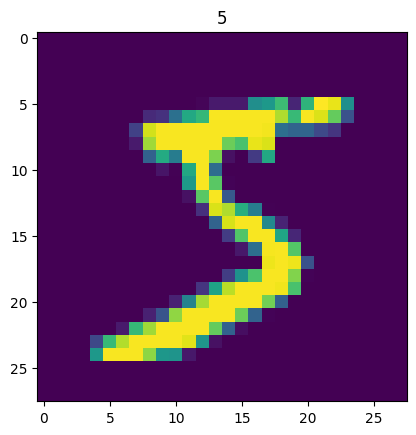

In [ ]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

In [ ]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

### 7. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [ ]:
from torch.utils.data import DataLoader

# set up the batch size
BATCH_SIZE = 32

# Turn the datasets into interables(batches)
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cc77cc41e70>,
 <torch.utils.data.dataloader.DataLoader at 0x7cc77c96c8e0>)

### 8. Recreate model_2 used in notebook 03 (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
class MNISTmodelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units *7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"shape of conv block 1 {x.shape}")
    x = self.conv_block_2(x)
    # print(f"shape of conv block 2 {x.shape}")
    x = self.classifier(x)
    # print(f"shape of output classifier{x.shape}")
    return x


In [ ]:
# creating some testing image
test_image, label = train_data[1]
test_image.shape

torch.Size([1, 28, 28])

In [ ]:
test_conv = nn.Conv2d(
    in_channels=1,
    out_channels=10,
    kernel_size=3,
    stride=1,
    padding=1)

In [ ]:
test_conv_image = test_conv(test_image)

In [ ]:
test_maxpool = nn.MaxPool2d(kernel_size=2)

In [ ]:
test_maxpool_image = test_maxpool(test_conv_image).shape

In [ ]:
# instantiate the model
model_3 = MNISTmodelV0(input_shape=1,
                       hidden_units=20,
                       output_shape=len(class_names))

In [ ]:
model_3.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.3332,  0.0630,  0.1027],
                        [-0.3109, -0.2189, -0.1110],
                        [ 0.0521, -0.2933, -0.1436]]],
              
              
                      [[[-0.1996,  0.0009, -0.1240],
                        [-0.0231, -0.2259, -0.2288],
                        [-0.1945, -0.1141, -0.2631]]],
              
              
                      [[[ 0.2795, -0.0662,  0.2868],
                        [ 0.1039, -0.2823,  0.2307],
                        [-0.0917, -0.1278, -0.2767]]],
              
              
                      [[[-0.3314,  0.0954, -0.0728],
                        [ 0.1298, -0.2736,  0.2475],
                        [-0.2447, -0.0576,  0.0696]]],
              
              
                      [[[ 0.1721,  0.2691,  0.3037],
                        [-0.2643,  0.0839, -0.1434],
                        [-0.0365, -0.2495,  0.3036]]],
              
              
      

In [ ]:
# set up a loss function and optimizer for model 2
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [ ]:
import requests
from pathlib import Path

# download helper functions from learn pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already, exists, skipping the download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already, exists, skipping the download...


In [ ]:
from helper_functions import accuracy_fn

In [ ]:
# Create another training function
def train_func(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
  """ Performs a training step with model trying to learn on the data loader"""

  train_loss, train_acc = 0, 0

  model_3.train()

  for X, y in dataloader:
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"train_loss: {train_loss:.5f} | train_acc: {train_acc:.2f}%")


In [ ]:
# Create another testing function
def test_func(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
  """ Performs a testing step with model trying to learn on the data """
  test_loss, test_acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for X, y in dataloader:
      test_pred = model(X)

      loss = loss_fn(test_pred, y)
      test_loss += loss
      test_acc += accuracy_fn(y,  test_pred.argmax(dim=1))

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
  print(f"test_loss: {test_loss:.5f} | test_acc: {test_acc:.2f}%")


In [ ]:
# import tqdm for progress bar
from tqdm.auto import tqdm

In [ ]:
torch.manual_seed(42)

# train the model and also test the model
epochs = 1
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_func(model=model_3,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_func(model=model_3,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 0
--------
train_loss: 0.27051 | train_acc: 90.84%
test_loss: 0.06191 | test_acc: 98.04%


In [ ]:
import random
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, '1 - one')

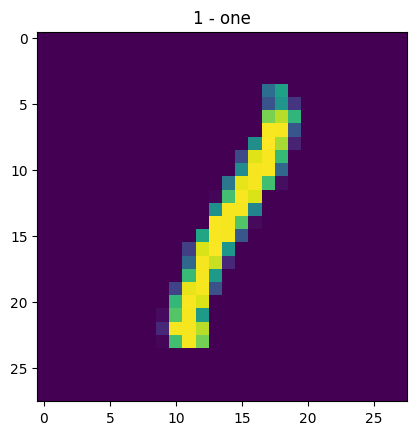

In [ ]:
# plt.imshow(test_samples[0].squeeze(), cmap="gray")
# plt.title(class_names[test_labels[0]])

plt.imshow(test_samples[0].squeeze())
plt.title(class_names[test_labels[0]])

In [ ]:
def make_predictions(model: torch.nn.Module,
                    data: list):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0)
      pred_logits = model(sample)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)
      pred_probs.append(pred_prob)

  return torch.stack(pred_probs)

In [ ]:
# pred_probs = make_predictions(model=model_2,
#                               data=test_samples)

# pred_classes = pred_probs.argmax(dim=1)
# pred_classes

pred_probs = make_predictions(model_3,
                              test_samples)

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 1, 6, 6, 2, 2, 2, 6, 7])

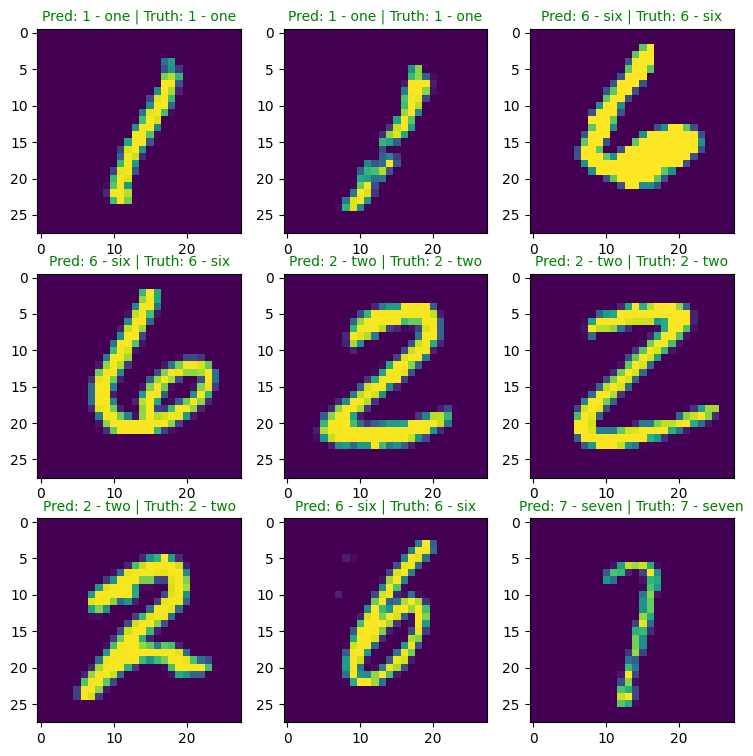

In [ ]:
# # plot predictions
# plt.figure(figsize=(9, 9))
# nrows= 3
# ncols = 3
# for i, sample in enumerate(test_samples):
#   # Create subplot
#   plt.subplot(nrows, ncols, i+1)

#   plt.imshow(sample.squeeze(), cmap="gray")

#   # Find the predictions (in text form, e.g " sandal")
#   pred_label = class_names[pred_classes[i]]

#   # Get the truth labels in text form
#   truth_label = class_names[test_labels[i]]

#   # create a title
#   title_text = f"pred: {pred_label} | Truth: {truth_label}"

#   # Check for equality between pred and truth and change the color of title text
#   if pred_label == truth_label:
#     plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
#   else:
#     plt.title(title_text, fontsize=10, c="r")

plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze())

  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')

### 11. Plot a confusion matrix comparing your model's predictions to the truth labels

In [ ]:
# Making predictions with our trained model
y_preds = []
model_3.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions...."):
    y_logits = model_3(X)
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred)

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]


Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1, 0, 4, 1, 8, 9, 8, 9])

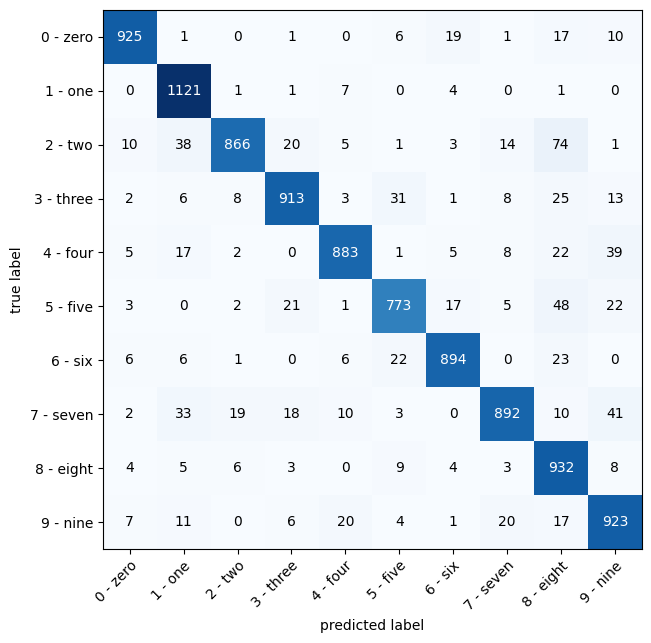

In [ ]:
# from torchmetrics import ConfusionMatrix
# from mlxtend.plotting import plot_confusion_matrix

# # 2. Set up confusion matrix instance and compare predictions to truth
# task = "multiclass"
# confmat = ConfusionMatrix(task=task,
#                           num_classes=len(class_names))
# confmat_tensor = confmat(preds=y_pred_tensor,
#                          target=test_data.targets)

# # 3. plt the confustion matrix
# fig, ax = plot_confusion_matrix(
#     conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
#     class_names=class_names,
#     figsize=(10, 7)


from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Set up confusion matrix instance and compare predictions to the truth
task = 'multiclass'
confmat = ConfusionMatrix(task=task,
                          num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# plt the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)